# Vision || EPOCH Laboratory

In [1]:
%pylab inline
import gym, random, cv2

from skimage import transform
from collections import deque
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [2]:
env = gym.make("Pong-v0")

In [3]:
screen_space = env.observation_space
num_states = env.observation_space.shape
action_space = env.action_space.n

print('Frame:', screen_space)
print('States:', num_states[0])
print('Actions:', action_space)

env.env.get_action_meanings()

Frame: Box(210, 160, 3)
States: 210
Actions: 6


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

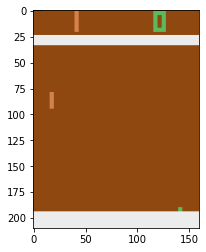

In [4]:
state = env.reset()
for i in range(100):
    clear_output(wait=True)
    action = np.random.choice(action_space)
    x_state, _, _, _ = env.step(action)
    plt.imshow(x_state)
    plt.show()

In [5]:
INPUT_SHAPE = [84, 84]
WINDOW_DEPTH = 4

BATCH_SIZE = 64
MAX_STEPS_PER_EPISODE = 100

In [6]:
def process_frame(frame):
    img = frame[25:-8,:]
    img = img.mean(axis=2)
    img = transform.resize(img, INPUT_SHAPE)
    n_img = img / 255.0  
    
    return n_img

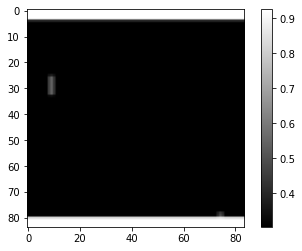

In [7]:
img = process_frame(x_state)
plt.imshow(img, cmap="gray")
plt.colorbar()

In [8]:
def frame_buffer(stack_frames, state, new_episode):
    frame = process_frame(state)
    
    if new_episode:
        for _ in range(4):
            stack_frames.append(frame)
    
    else:
        stack_frames.append(frame)

    stack_state = np.stack(stack_frames, axis=2)
    
    return stack_state, stack_frames

In [9]:
def add_memory(experience):
    return memory.append(experience)

In [10]:
def sample(BATCH_SIZE):
    mem_size = len(memory)
    index = np.random.choice(np.arange(buffer_size), size=BATCH_SIZE, replace=False)
    return [memory[i] for i in index]

In [11]:
memory = deque(maxlen=20000)

In [12]:
stack_frames = deque([np.zeros(INPUT_SHAPE, dtype=int) for i in range(WINDOW_DEPTH)], maxlen=4)

In [13]:
state = env.reset()
state, stack_frames = frame_buffer(stack_frames, state, True)

In [14]:
for i in range(MAX_STEPS_PER_EPISODE):
    action = np.random.choice(action_space)
    n_state, reward, done, _ = env.step(action)
    
    n_state, stack_frames = frame_buffer(stack_frames, n_state, False)
    
    if done:
        n_state = np.zeros(WINDOW_SIZE)
        add_memory((state, action, reward, n_state, done))
        state = env.reset()
        state, stack_frames = frame_buffer(stack_frames, state, True)
    else:
        add_memory((state, action, reward, n_state, done))
        state = n_state

deque([array([[0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       ...,
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902]]), array([[0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       ...,
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],
       [0.9254902, 0.9254902, 0.9254902, ..., 0.9254902, 0.9254902,
        0.9254902],

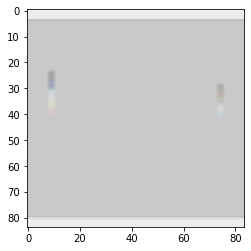

In [15]:
print(stack_frames)
plt.imshow(state)

In [16]:
def viewslice(state, count):
    frame = np.array(state)
    frame = processed_frame = np.repeat(frame[:, :, count, np.newaxis], 3, axis=2)
    frame = cv2.resize(frame, dsize=(screen_space.shape[1], screen_space.shape[0]))
    return frame

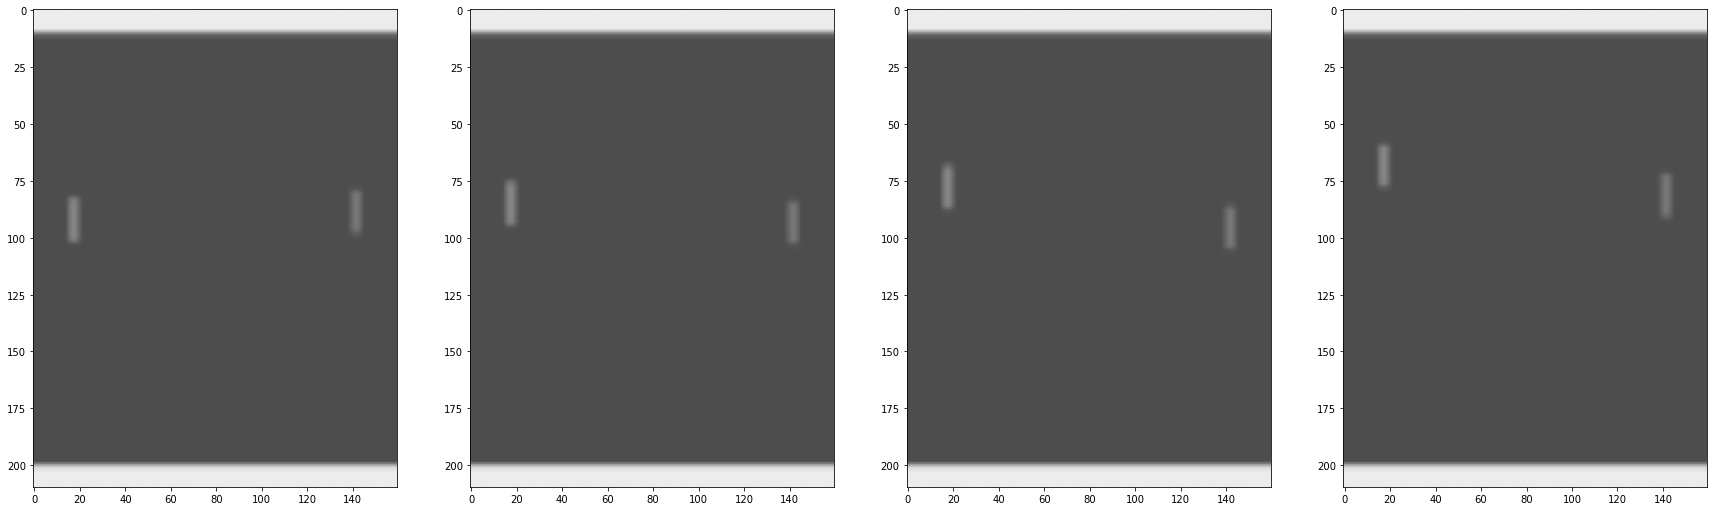

In [17]:
nplot = 4

fig = plt.figure(figsize=(30,30))
for count in range(1, nplot+1):
    frame = viewslice(state, count-1)
    ax = fig.add_subplot(1,nplot,count)
    ax.imshow(frame)